# Forecast

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import m5.preprocessing as preprocessing
from m5.models import Naive, ETS, ARIMA, BottomUp, LGBM
from m5.evaluate import accuracy
from m5.plot import plot_fcst
from m5.definitions import ROOT_DIR

# Library settings
pd.options.display.max_columns = 999
plt.rcParams["figure.figsize"] = (16, 4)

## Preprocessing

In [ ]:
preprocessing.unzip_data()

In [ ]:
preprocessing.prepare_base_data(task="test")

In [ ]:
preprocessing.prepare_agg_levels()

In [ ]:
preprocessing.prepare_store_data()

In [10]:
preprocessing.prepare_all_datasets()

Preparing dataset for store 0 and step 7
Preparing dataset for store 0 and step 14
Preparing dataset for store 0 and step 21
Preparing dataset for store 0 and step 28
Preparing dataset for store 1 and step 7
Preparing dataset for store 1 and step 14
Preparing dataset for store 1 and step 21
Preparing dataset for store 1 and step 28
Preparing dataset for store 2 and step 7
Preparing dataset for store 2 and step 14
Preparing dataset for store 2 and step 21
Preparing dataset for store 2 and step 28
Preparing dataset for store 3 and step 7
Preparing dataset for store 3 and step 14
Preparing dataset for store 3 and step 21
Preparing dataset for store 3 and step 28
Preparing dataset for store 4 and step 7
Preparing dataset for store 4 and step 14
Preparing dataset for store 4 and step 21
Preparing dataset for store 4 and step 28
Preparing dataset for store 5 and step 7
Preparing dataset for store 5 and step 14
Preparing dataset for store 5 and step 21
Preparing dataset for store 5 and step 2

In [3]:
preprocessing.prepare_all_dataset_binaries()

Preparing dataset binary for store 0 and step 7
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Info] Construct bin mappers from text data time 0.29 seconds
[LightGBM] [Info] Saving data to binary file /home/ec2-user/m5-forecasting/data/processed/datasets/0/7/train.lgbm


/home/ec2-user/anaconda3/envs/m5-forecasting/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/home/ec2-user/anaconda3/envs/m5-forecasting/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Info] Saving data to binary file /home/ec2-user/m5-forecasting/data/processed/datasets/0/7/val.lgbm
Preparing dataset binary for store 0 and step 14
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Info] Construct bin mappers from text data time 0.15 seconds
[LightGBM] [Info] Saving data to binary file /home/ec2-user/m5-forecasting/data/processed/datasets/0/14/train.lgbm
[LightGBM] [Info] Saving data to binary file /home/ec2-user/m5-forecasting/data/processed/datasets/0/14/val.lgbm
Preparing dataset binary for store 0 and step 21
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Info] Construct bin mappers from text data time 0.14 seconds
[LightGBM] [Info] Saving data to binary file /home/ec2-user/m5-forecasting/data/processed/datasets/0/21/train.lgbm
[LightGBM] [Info] Saving 

## Naive

In [ ]:
naive_bu = BottomUp("naive", Naive, n_jobs=-1)

In [ ]:
naive_bu.train()

In [ ]:
naive_bu.predict(fh=28)

In [ ]:
plot_fcst("naive", level=12, key=(0, 0))

In [ ]:
accuracy(model="naive")

## ETS

In [10]:
ets_bu = BottomUp(model_name="ets", model_cls=ETS, model_params={"auto": True}, regressors=None, n_jobs=-1)

In [ ]:
ets_bu.train(disp=False)

In [ ]:
ets_bu.predict(fh=28)

In [ ]:
plot_fcst("ets", level=12, key=(500, 0), plot_tail=False)

In [11]:
accuracy(model="ets")

,1,2,3,4,5,6,7,8,9,10,11,12,Average
wmrsse,0.70213,0.71093,0.743657,0.713441,0.773285,0.729349,0.773365,0.756105,0.798898,0.84406,0.866912,0.892591,0.775394


## ARIMA

In [ ]:
arima_bu = BottomUp(
    model_name="arima", 
    model_cls=ARIMA, 
    model_params={
        "d": None, 
        "start_p": 1, 
        "max_p": 7, 
        "start_q": 0, 
        "max_q": 0,
        "m": 1,
        "method": "lbfgs",
    }, 
    regressors=None,
)

In [ ]:
arima_bu.train()

In [ ]:
arima_bu.predict(fh=28)

In [ ]:
plot_fcst("arima", level=12, key=(0, 0))

In [ ]:
accuracy(model="arima")

## LGBM

In [4]:
LGBM_PARAMS = {
    "task": "train",
    "objective": "tweedie",
    "num_iterations": 300,
    "learning_rate": 0.1,
    "num_leaves": 31,
    "num_threads": 8,
    "early_stopping_round": 20,
}

In [5]:
lgbm_bu = LGBM("lgbm", model_params=LGBM_PARAMS)

In [6]:
lgbm_bu.train()

Start training...
Training model for store 0
Training model for store 0 and step 7
[LightGBM] [Info] Load from binary file /home/ec2-user/m5-forecasting/data/processed/datasets/0/7/train.lgbm


/home/ec2-user/anaconda3/envs/m5-forecasting/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/ec2-user/anaconda3/envs/m5-forecasting/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.162790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6164
[LightGBM] [Info] Number of data points in the train set: 4635212, number of used features: 27
[LightGBM] [Info] Start training from score 0.492344
Training model for store 0 and step 14
[LightGBM] [Info] Load from binary file /home/ec2-user/m5-forecasting/data/processed/datasets/0/14/train.lgbm
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.225579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6140
[LightGBM] [Info] Number of data points in the train set: 4613869, number of used features: 27
[LightGBM] [Info] Start training from score 0.491981
Training model for store 0 an

In [7]:
lgbm_bu.predict()

Start predicting...
Making predictions for level 0
Making predictions for level 0 and step 7
Making predictions for level 0 and step 14
Making predictions for level 0 and step 21
Making predictions for level 0 and step 28
Making predictions for level 1
Making predictions for level 1 and step 7
Making predictions for level 1 and step 14
Making predictions for level 1 and step 21
Making predictions for level 1 and step 28
Making predictions for level 2
Making predictions for level 2 and step 7
Making predictions for level 2 and step 14
Making predictions for level 2 and step 21
Making predictions for level 2 and step 28
Making predictions for level 3
Making predictions for level 3 and step 7
Making predictions for level 3 and step 14
Making predictions for level 3 and step 21
Making predictions for level 3 and step 28
Making predictions for level 4
Making predictions for level 4 and step 7
Making predictions for level 4 and step 14
Making predictions for level 4 and step 21
Making predic

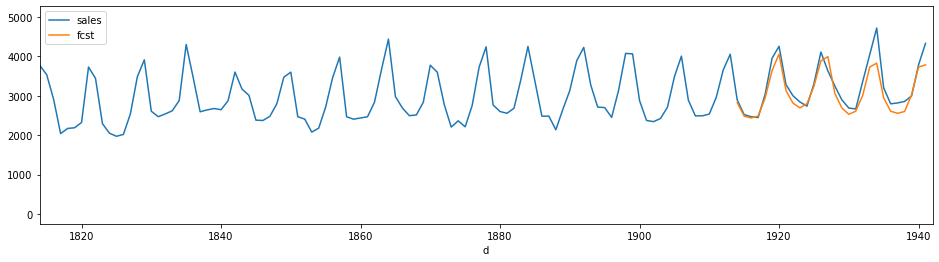

In [8]:
plot_fcst("lgbm", level=8)

In [9]:
accuracy(model="lgbm")

,1,2,3,4,5,6,7,8,9,10,11,12,Average
wmrsse,0.595105,0.600441,0.656533,0.617326,0.680094,0.638869,0.694356,0.695997,0.753857,0.864307,0.876887,0.900945,0.71456


## Misc